<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana Esmeralda Rodríguez Rodríguez y José Antonio Castaño Gutiérrez

**Fecha:** 7 de Marzo del 2021.

**Expediente** : 709288 y 711469.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 5: Clase 9
**Link al repositorio en Github**: https://github.com/anarodriguezrod/Tarea5_AERodriguez_JACasta-o

Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ (recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada) ver este enlace para más información. Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.

Generación variable aleatoria continua El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución $$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>
Generación variable aleatoria Discreta La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo. Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$ Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como: $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$
Nota: Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import optimize
import random
from scipy import optimize
import pandas as pd

### Solución Ana

Generación variable aleatoria continua El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución $$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

Funcion inversa: $$x =sin^{2}{\frac{U\pi}{2}}$$

Función de distribucion:
    $$\frac{d}{dx}=\frac{1}{\pi\sqrt{1-x}\sqrt{x}}$$

/Users/anarodriguez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


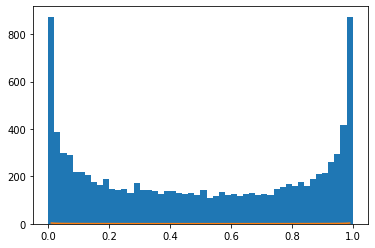

In [13]:
funcion= lambda x: 1/((np.sqrt(1-x))*np.sqrt(x)*np.pi)
inver= lambda u: (np.sin(u*np.pi/2))**2
n= 10000

def comparacion(funcion, inver, n):
    u=np.random.uniform(0,1,n)
    f_rand=inver(u)
    x=np.arange(0,1,.01)
    funcion_densidad=funcion(x)
    plt.hist(f_rand,bins=50)
    plt.plot(x,funcion_densidad)
    plt.show()
    
comparacion(funcion,inver,n)

Generación variable aleatoria Discreta La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo. Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$ Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como: $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

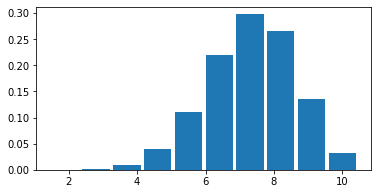

In [20]:
def distribucion_discreta(u1, probabilidad_acumulada):
    vector = np.array(list(map(lambda j:sum(1 for i in probabilidad_acumulada if i<u1[j]),range(N))))
    return vector
def histograma_discreto(distribucion):
    plt.figure(figsize=[6,3])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = True) 
    plt.bar(x[1:],y)
    plt.show()
    
def proba_binomial(n1,p1):
    proba1 = np.zeros(n1) 
    proba1[0] = (1-p1)**n1 
    def proba2(i):
        nonlocal proba1
        c  = p1/(1-p1)
        proba1[i+1]=(c*(n1-i)/(i+1))*proba1[i]       
    [proba2(i) for i in range(n1-1)]
    return np.cumsum(proba1)
n1 = 10; p1 = 0.7; N = 10**4

proba_acumulada = proba_binomial(n1,p1)
u1 = np.random.rand(N)

#método de la transformada inversa
d_binomial = distribucion_discreta(u1,proba_acumulada)
histograma_discreto(d_binomial)

Validación
$$Px= \frac{n!}{x!(n-x)!}p^{x}(1-p)^{n-x}$$
$$P_{x+1}= \frac{n!}{(x+1)!(n-x-1)!}P^{x+1}(1-P)^{n-x-1}$$
$$\frac{P_{x+1}}{P_{x}}= \frac{\frac{n!}{x!(n-x-1)!}p^{x+1}(1-p)^{n-x-1}}{\frac{n!}{(x+1)!(n-x-1)!}P^{x+1}(1-P)^{n-x}}
$$
$$\frac{P_{x+1}}{P_{x}} = \frac{n!}{(x+1)!(n-x-1)!}\frac{p^{x+1}(1-p)^{n-x-1}}{P^{x}(1-P)^{n-x}}\frac{x!(n-x)!}{n!}$$
$$\frac{P_{x+1}}{P_{x}} = \frac{n-x}{x+1}\frac{p}{1-p}$$
$$P_{x+1}= \frac{n-x}{x+1}\frac{p}{1-p}P_{x}$$
$$P_{i+1}= \frac{n-i}{x+1}\frac{p}{1-p}P_{i}$$


### Solución Jose

In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

<ipython-input-2-ea5f0cf88499>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))


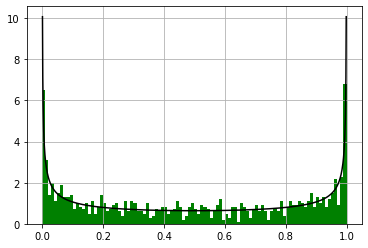

In [2]:
#1.Función de prob acumulada para generar los aleatorios
m = np.random.rand(1000)
fx = np.sin(np.pi / 2 * m)**2
#Derivamos para obtener f(x) y comprobamos que los puntos generados esten por debajo de la curva
x = np.arange(0.00, 1, 0.001)
y = 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))
plt.plot(x, y, color = 'black')
plt.hist(fx, 100, density = True, color = 'green')
plt.grid()
plt.show()

#2.Distribucion binomial
$$ p_i+1=\frac{n!}{(i+1)!(n-(i+1))!}p^(i+1)(1-p)^{n-(i+1)}$$

$$ p_i+1=\frac{n!}{(i+1)(i)!(i+1)(n-i)!}p^(i+1)(1-p)^{n-(i+1)}$$

Queda $$p_{i+1}=\frac{n-i}{(1+i)}P \frac {p_i}{1-p}$$